# Практическая работа 1

Выполнила: Савосько Анастасия, ММР211

**Этот dataset содержит данные, собранные у участников скоростных свиданий с 2002 по 2004 гг.  Участников попросили оценить первое свидание по 6 параметрам: привлекательность, искренность, интеллект, веселье, амбиции и общие интересы. Более того, здесь представлены данные о расе респондентов, об их отношении к религии и расе партнёра, а также об их ожиданиях.**

**Гипотезы:**
1. Религия и раса не важны для участников скоростных свиданий.
2. Самый популярный возраст для свиданий - 25 лет.
3. На скоростных свиданиях людей с европейской внешность будет больше, чем представителей любой другой расы
4. Большая часть участнико не назначит свиданий после экспериментов и не получи ни одного звонка от своих пар.
5. Люди, у которых была цель провести фан-вечер и познакомиться с новыми людьми, получили наибольшее количество "пар".
6. Мужчины чаще ищут в партнёре привлекательность, а женщины - интеллект.
7. Самым популярным времяпровождением для участников обоих полов является просмотр фильмов.

In [1]:
import pandas as pd
# Pandas — это библиотека Python для обработки и анализа структурированных данных, её название происходит от «panel data» («панельные данные»). Панельными данными называют информацию, полученную в результате исследований и структурированную в виде таблиц. Для работы с такими массивами данных и создан Pandas.
import glob
# Модуль glob находит все пути, совпадающие с заданным шаблоном в соответствии с правилами, используемыми оболочкой Unix. Обрабатываются символы "*" (произвольное количество символов), "?" (один символ), и диапазоны символов с помощью [].
import os
# Модуль os предоставляет множество функций для работы с операционной системой, причём их поведение, как правило, не зависит от ОС, поэтому программы остаются переносимыми.
import numpy as np
# NumPy — это библиотека языка Python, добавляющая поддержку больших многомерных массивов и матриц, вместе с большой библиотекой высокоуровневых (и очень быстрых) математических функций для операций с этими массивами.
import matplotlib.pyplot as plt
# Matplotlib — это библиотека на языке Python для визуализации данных. В ней можно построить двумерные (плоские) и трехмерные графики.
%matplotlib inline 
# Команда %matplotlib inline указывает, что график необходимо построить все в той же оболочке Jupyter, но теперь он выводится как обычная картинка. Данный способ удобен тем, что позволяет проводить очень много экспериментов в рамках одного окна (точнее web-страницы).
import seaborn as sns
# Seaborn – это библиотека для создания статистической инфографики на Python. Он построен поверх matplotlib, а также поддерживает структуры данных numpy и pandas.
import holoviews
from IPython.display import display



In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# os.walk(top, topdown=True, onerror=None, followlinks=False) - генерация имён файлов в дереве каталогов, сверху вниз (если topdown равен True), либо снизу вверх (если False). Для каждого каталога функция walk возвращает кортеж (путь к каталогу, список каталогов, список файлов).
# os.path.join(path1[, path2[, ...]]) - соединяет пути с учётом особенностей операционной системы.        
Speed_DD=pd.read_csv('C:/Users/Savosko.viktoriya/DS/Speed_Dating_Data.csv', encoding= 'unicode_escape')

In [3]:
Speed_DD.shape

(8378, 195)

In [4]:
Speed_DD[:2] #выводим первые 2 строчки, чтобы проверить, что получилось
# Микровывод:Очень много данных, но использовать в анализе все не буду.

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [5]:
# Мне хотелось попробовать нарисовать 2 диаграммы в plotly (в следующих 4х операциях примечания в основном для меня)
# Вопрос:Что люди ищут в противоположном поле? 
pd.options.display.max_rows = 1000
import plotly.offline as py
#Plotly — библиотека для визуализации данных (позволяет строить интерактивные визуализации)
# Похожие на plotly - это bokeh и pygal 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
# Фигуры представляются данными в формате JSON (JavaScript Object Notation), который по структуре мало чем отличается от словаря (dict) в Python. Доступ к ним возможен через вызов класс plotly.graph_objects.
import plotly.tools as tls

atributes_gender = Speed_DD[['gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].groupby('gender').mean()
cols = ['Привлекательность','Искренность','Интеллект','Чувство юмора','Амбиции','Общие интересы']
# Переименовываем столбики (т.к. очень непонятно)
atributes_gender.columns = cols

In [6]:
trace1 = go.Bar(y=list(atributes_gender.iloc[1]),x=atributes_gender.columns.values,name='Мужчины',marker=dict(color='#FFD700'))
# Я пока не "декодировала" данные в таблице, поэтому в графе "пол" у мужчин стоит "1"
# Первый корневой атрибут data имеет значением список словарей. Эти словари называются traces.
trace2 = go.Bar(y=list(atributes_gender.iloc[0]),x=atributes_gender.columns.values,name='Женщины',marker=dict(color='#8B008B'))
# Я пока не "декодировала" данные в таблице, поэтому в графе "пол" у женщин стоит "0"
data1 = [trace1, trace2]

layout = go.Layout(title='Что люди ищут в противоположном поле?',font=dict(size=16),legend=dict(font=dict(size=15)))
# Второй корневой атрибут layout имеет значением словарь.Отвечает за визуализацию (заголовок, размер и т.д.) 
# Данный атрибут ответственен за расположение и настройки не связанных с данными частей фигуры.
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='barchart')
# Микровывод:Мужчины чаще ищут привлекательность, а женщины - интеллект. 

In [7]:
# Вопрос: Какие интересы у мужчин и женщин (по видам деятельности)?
activities_interested=['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading',
                       'tv','theater','movies','concerts','music','shopping','yoga']
activities = Speed_DD.groupby(['gender']).mean()[activities_interested].values
# Решила не переименовывать

In [8]:
trace1 = go.Bar(x=activities_interested, y=activities[0,:],name='Женщины',marker=dict(color='#FFD700'))

trace2 = go.Bar(x=activities_interested,y=activities[1,:],name='Мужчины',marker=dict(color='#8B008B'))

data2 = [trace1, trace2]

layout = go.Layout(title='Интересы по видам деятельности Мужчин и Женщин',font=dict(size=16),barmode = 'stack',legend=dict(font=dict(size=15)))

fig = go.Figure(data=data2, layout=layout)
py.iplot(fig, filename='barchart')
# Микровывод: Самое популярное - просмотр фильмов

In [9]:
# Поскольку с шифрами и английским мне работать не удобно, я переименовала те данные, с которыми собиралась работать
pd.options.display.max_columns = None

Speed_DD.rename(columns={"gender": "Пол", 
                    "condtn":"Условие",
                    "age":"Возраст",
                    "wave":"Волна",
                    "field":"Область изучения",
                    "field_cd":"Область изучения код",
                    "age_o":"Возраст партнёра",
                    "race_o":"Раса партнёра",
                    "race":"Раса",    
                    "pf_o_att":"Заявленное предпочтение партнера",
                    "dec_o":"Решение партнёра",
                    "attr_o":"Оценка партнера по атрибутам",
                    "imprace":"Важность расы",
                    "imprelig":"Важность религии",
                    "from":"Родом из",
                    "goal":"Цель",
                    "go_out":"Как часто вы выходите в свет (не обязательно на свидания)?",
                    "career_c":"Какова ваша предполагаемая карьера?",
                    "career":"Профессия",    
                    "income":"Доход", 
                    "match":"Пара",
                    "round":"Количество людей, которые встретились в волне", 
                    "partner":"Идентификационный номер партнера в день мероприятия",
                    "position":"Номер места встречи с партнёром",
                    "positin1":"Номер места, с которого начали",
                    "order":"Номер свидания в тот вечер, когда встретил партнера",
                    "samerace":"Участник и партнер были одной расы?",     
                    "date":"Частота свиданий"}, inplace=True)

race_replacement={1:"Афроамериканец",
                 2: "Американец европейского происхождения",
                 3: "Латиноамериканец",
                 4: "Американец азиатского происхождения",
                 5: "Коренной американец",
                 6: "Другое"}

field_replacement={1:"Законодательство",
                   2:"Математика",
                   3:"Социальные науки, психология",
                   4:"Медицинские науки, фармацевтика и биотехнологии",
                   5:"Инженерия",
                   6:"Английский язык, творческое письмо, журналистика",
                   7:"История, религия, философия",
                   8:"Бизнес, экономика, финансы",
                   9:"Образование",
                   10:"Биологические науки, химия, физика",
                   11:"Социальная работа",
                   12:"Студент, не определился",
                   13:"Политология, международные отношения",
                   14:"Фильм",
                   15:"Изящные искусства",
                   16:"Языки",
                   17:"Архитектура",
                   18:"Другое"}

career_replacement={1: "Юрист",
                   2:  "Академик, исследователь",
                   3:  "Психолог",
                   4:  "Доктор, медицина",
                   5:  "Инженер",
                   6:  "Творчество, развлечение",
                   7:  "Банковское дело, консалтинг, финансы, маркетинг, бизнес, генеральный директор, предприниматель, администратор",
                   8:  "Недвижимость",
                   9:  "Международные, гуманитарные вопросы",
                   10: "Не определился",
                   11: "Социальная работа",
                   12: "Патология речи",
                   13: "Политика",
                   14: "Профессиональный спорт",
                   15: "Другое",
                   16: "Журналистика",
                   17: "Архитектура"}

decision_replacement={1:"Да", 0:"Нет"}
length_replacement={1:"Слишком мало",
                   2: "Слишком много",
                   3: "В самый раз"}
goal_replacement={1:"Фан-встреча",
                 2: "Чтобы познакомиться с новыми людьми",
                 3: "Назначить свидание",
                 4:"Ищу серьезные отношения",
                 5:"Сказать, что я сделал это",
                 6: "Другое"}
frequency_replacement={1:"Несколько раз в неделю",
                      2: "Два раза в неделю",
                      3: "Раз в неделю",
                      4: "Два раза в месяц",
                      5: "Раз в месяц",
                      6: "Несколько раз в год",
                      7: "Почти никогда"}


Speed_DD["Пол"].replace({0:"Женский",1:"Мужской"}, inplace=True)
Speed_DD["Условие"].replace({1:"Ограниченный выбор", 2:"Большой выбор"}, inplace=True)
Speed_DD["Пара"].replace({1:"Да",0:"Нет"}, inplace=True)
Speed_DD["Участник и партнер были одной расы?"].replace({1:"Да",0:"Нет"},inplace=True)
Speed_DD["Раса партнёра"].replace(race_replacement, inplace=True)
Speed_DD["Решение партнёра"].replace(decision_replacement, inplace=True)
Speed_DD["Область изучения код"].replace(field_replacement, inplace=True)
Speed_DD["Раса"].replace(race_replacement, inplace=True)
Speed_DD["Какова ваша предполагаемая карьера?"].replace(career_replacement, inplace=True)
# Speed_DD["length"].replace(length_replacement, inplace=True)
Speed_DD["numdat_2"].replace({1:"Слишком мало", 2: "Слишком много", 3: "В самый раз"}, inplace=True)
#Speed_DD["date_3"].replace({1:"Да",0:"Нет", 0:np.nan}, inplace=True)
Speed_DD["Цель"].replace(goal_replacement, inplace=True)
Speed_DD["Частота свиданий"].replace(frequency_replacement, inplace=True)
Speed_DD["Как часто вы выходите в свет (не обязательно на свидания)?"].replace(frequency_replacement, inplace=True)

Speed_DD[:2]

  

,iid,id,Пол,idg,Условие,Волна,"Количество людей, которые встретились в волне",Номер места встречи с партнёром,"Номер места, с которого начали","Номер свидания в тот вечер, когда встретил партнера",Идентификационный номер партнера в день мероприятия,pid,Пара,int_corr,Участник и партнер были одной расы?,Возраст партнёра,Раса партнёра,Заявленное предпочтение партнера,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,Решение партнёра,Оценка партнера по атрибутам,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,Возраст,Область изучения,Область изучения код,undergra,mn_sat,tuition,Раса,Важность расы,Важность религии,Родом из,zipcode,Доход,Цель,Частота свиданий,Как часто вы выходите в свет (не обязательно на свидания)?,Профессия,Какова ваша предполагаемая карьера?,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,Женский,1,Ограниченный выбор,1,10,7,NaN,4,1,11.0,Нет,0.14,Нет,27.0,Американец европейского происхождения,35.0,20.0,20.0,20.0,0.0,5.0,Нет,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,Законодательство,NaN,NaN,NaN,Американец азиатского происхождения,2.0,4.0,Chicago,"60,521","69,487.00",Чтобы познакомиться с новыми людьми,Почти никогда,Несколько раз в неделю,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,Слишком мало,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Женский,1,Ограниченный выбор,1,10,7,NaN,3,2,12.0,Нет,0.54,Нет,22.0,Американец европейского происхождения,60.0,0.0,0.0,40.0,0.0,0.0,Нет,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,Законодательство,NaN,NaN,NaN,Американец азиатского происхождения,2.0,4.0,Chicago,"60,521","69,487.00",Чтобы познакомиться с новыми людьми,Почти никогда,Несколько раз в неделю,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,Слишком мало,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [10]:
Speed_DD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(166), int64(8), object(21)
memory usage: 12.5+ MB


In [11]:
Speed_DD["Количество людей, которые встретились в волне"].max() # максимальное значение
# Микровывод: Максимально число человек, которые могут встретиться в волне 22

22

In [12]:
Speed_DD["Количество людей, которые встретились в волне"].min() # минимальное значение
# Микровывод: Минимально число человек, которые могут встретиться в волне 5

5

In [13]:
Speed_DD["Возраст партнёра"].sort_values() #минимальный и максимальный разброс

1657    18.0
1717    18.0
1727    18.0
1707    18.0
1677    18.0
        ... 
8271     NaN
8293     NaN
8315     NaN
8337     NaN
8359     NaN
Name: Возраст партнёра, Length: 8378, dtype: float64

<AxesSubplot:>

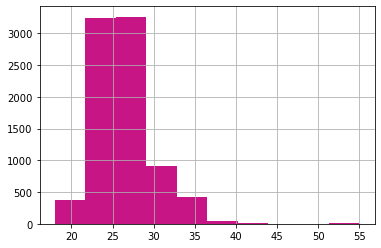

In [14]:
Speed_DD["Возраст партнёра"].hist(color = ['#C71585']) # визуализируем
# Микровывод: Чаще всего встречались испытуемые в возрасте от 20 до 30 лет.

In [15]:
Speed_DD['Возраст партнёра'].describe()
# Микровывод: Самый младший из учасников был в возрасте 18 лет, а самый старший - 55 лет.

count    8274.000000
mean       26.364999
std         3.563648
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: Возраст партнёра, dtype: float64

In [16]:
Speed_DD['Возраст партнёра'].mode() #одномодальное, т.к. у нас 1 мода (узнали после вывода)
# Микровывод:Самый популярный возраст для свиданий - 27 лет.

0    27.0
Name: Возраст партнёра, dtype: float64

<AxesSubplot:xlabel='Возраст партнёра'>

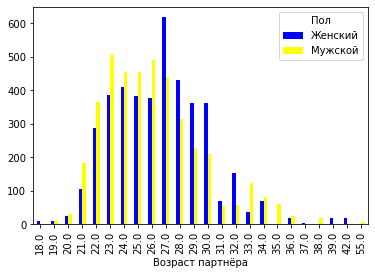

In [17]:
# Группировка участников по полу и возрасту 
Speed_DD.groupby('Возраст партнёра')['Пол'].value_counts().unstack().plot(kind = 'bar', color = ['blue', 'yellow'])
# Микровывод: Больше всего мужчин встречалось в возрасте 23 лет, а женщин - 27 лет.

<AxesSubplot:xlabel='Раса партнёра'>

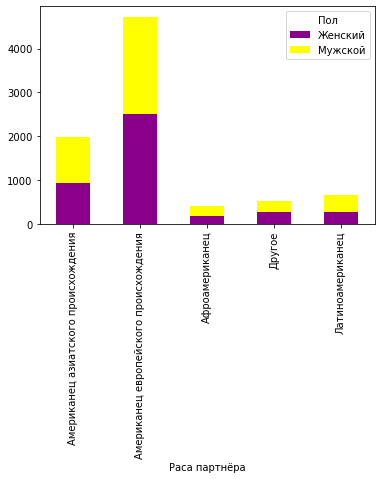

In [18]:
# Группировка участников по полу и расе 
Speed_DD.groupby('Раса партнёра')['Пол'].value_counts().unstack().plot(kind = 'bar',color = ['#8B008B', 'yellow'], stacked = True)
# Микровывод:Самой распространённой рассой (как для мужчин, так и для женщин) стала "американец европейского происхождения"

<AxesSubplot:title={'center':'Насколько важна раса?'}, ylabel='None'>

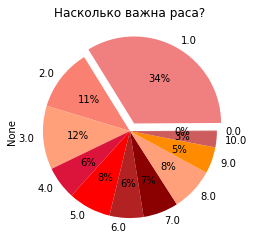

In [19]:
# Насколько важна раса?
colors = ['#CD5C5C', '#F08080', '#FA8072', '#FFA07A', '#DC143C', 'red','#B22222', '#8B0000','#FFA07A', '#FF8C00']
Speed_DD.groupby("Важность расы").size().plot.pie(y="iid", autopct='%1.0f%%', colors = colors,
                                                  explode = [0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0], title = 'Насколько важна раса?')
# Микровывод: Раса при выборе партнёра не важна

<AxesSubplot:title={'center':'Насколько важна религия?'}, ylabel='None'>

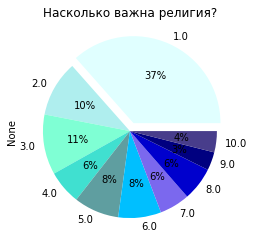

In [20]:
# Насколько важна религия?
colors = ['#E0FFFF', '#AFEEEE', '#7FFFD4', '#40E0D0', '#5F9EA0', '#00BFFF','#7B68EE', '#0000CD','#000080', '#483D8B']
Speed_DD.groupby("Важность религии").size().plot.pie(y="iid",autopct='%1.0f%%',colors = colors, 
                                                     explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0], title = 'Насколько важна религия?')
# Микровывод: Религия при выборе партнёра не важна

In [21]:
# Сколько человек участвовало в исследовании?
l=(Speed_DD.groupby("iid").count())
len(l)
# Микровывод: Всего в исследовании участвовало 551 человек

551

<AxesSubplot:title={'center':'Соотношение большого и ограниченного выбора'}, ylabel='iid'>

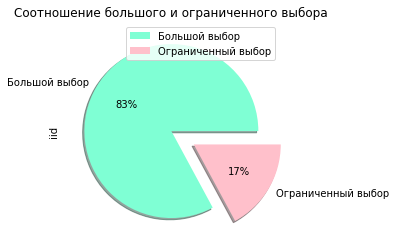

In [22]:
# Соотношение большого и ограниченного выбора 
colors = ['#7FFFD4', '#FFC0CB']
# номер цветов искала на этом сайте https://colorscheme.ru/html-colors.html
(Speed_DD.groupby("Условие")[["iid"]].count()).plot.pie(y="iid", autopct='%1.0f%%',colors = colors, 
                                                        explode = [0, 0.3], title = 'Соотношение большого и ограниченного выбора', 
                                                        shadow = True)
# Микровывод: У 83% опрошенных был большой выбор партнёров

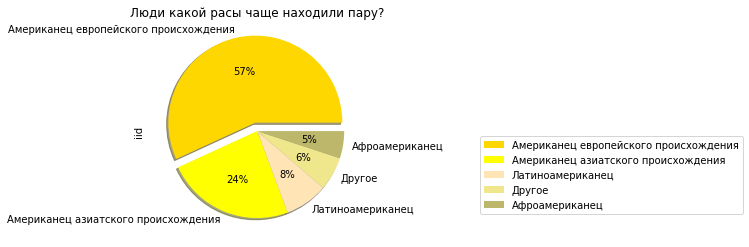

In [23]:
colors = ['#FFD700', '#FFFF00', '#FFE4B5', '#F0E68C', '#BDB76B']
(Speed_DD.groupby(["Раса"])[["Пара", "iid"]].count().sort_values("Пара", ascending=False).
 head(100)).plot.pie(y="iid", autopct='%1.0f%%', colors = colors, 
                     explode = [0.1, 0, 0, 0, 0], title = 'Люди какой расы чаще находили пару?', shadow = True)
plt.legend(bbox_to_anchor = (1.5, 0.5))
# Микровывод: Чаще всего пару находили американцы европейского происхождения (57%)

<AxesSubplot:xlabel='expnum'>

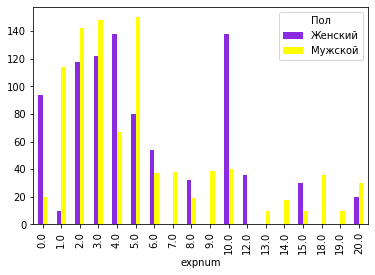

In [24]:
# Группировка участников по полу и ожиданием (Из 20 человек, с которыми вы встретитесь, сколько, по вашему мнению, будут заинтересованы в том, чтобы встречаться с вами?)
Speed_DD.groupby("expnum")["Пол"].value_counts().unstack().plot(kind = 'bar',color = ['#8A2BE2', '#FFFF00'])

In [25]:
(Speed_DD.groupby(["Область изучения", "Пол"])[["Пара"]].count().sort_values("Пара", ascending=False).head(100))
# Взависимости от пола были востребованы разные профессии. 

Пара
Область изучения                             Пол          
Business                                     Мужской   430
MBA                                          Мужской   415
Social Work                                  Женский   360
Law                                          Мужской   253
                                             Женский   209
International Affairs                        Мужской   173
Electrical Engineering                       Мужской   127
Finance                                      Мужской   102
Business                                     Женский    91
Psychology                                   Женский    90
International Affairs                        Женский    79
Sociology                                    Мужской    78
law                                          Мужской    77
Business (MBA)                               Мужской    77
business                                     Мужской    74
Biochemistry                                 Мужской    70
Mathematics                                  Женский    56
School Psychology                            Женский    56
Clinical Psychology                          Женский    56
Physics                                      Мужской    56
Education                                    Женский    55
Political Science                            Женский    55
Film                                         Мужской    54
MBA                                          Женский    53
medicine                                     Женский    52
sociology                                    Женский    52
Engineering                                  Мужской    52
Psychology                                   Мужской    49
Computer Science                             Мужской    48
Biology                                      Мужской    48
engineering                                  Мужской    46
law                                          Женский    46
English                                      Женский    45
MFA Acting Program                           Женский    44
Genetics                                     Женский    42
MA Biotechnology                             Женский    40
Operations Research                          Мужской    40
chemistry                                    Мужской    39
Mathematics                                  Мужской    39
Economics                                    Женский    38
psychology                                   Женский    38
Biomedical Engineering                       Мужской    38
microbiology                                 Женский    38
Film                                         Женский    38
Electrical Engineering                       Женский    37
Biology                                      Женский    37
Counseling Psychology                        Женский    37
EDUCATION                                    Женский    36
business                                     Женский    36
Financial Engineering                        Мужской    36
Education Policy                             Женский    36
music education                              Женский    36
Epidemiology                                 Женский    35
International affairs                        Женский    35
Organizational Psychology                    Женский    34
Elementary Education                         Женский    33
electrical engineering                       Мужской    32
Urban Planning                               Женский    30
International Business                       Мужской    30
SIPA-International Affairs                   Женский    30
Engineering                                  Женский    29
Economics                                    Мужской    29
Mechanical Engineering                       Мужской    29
social work                                  Женский    26
political science                            Женский    26
Philosophy                                   Мужской    25
Classics                                  

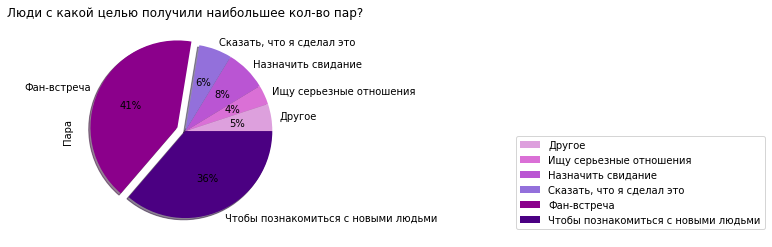

In [26]:
# Люди с какой целью получили наибольшее кол-во пар?
colors = ['#DDA0DD', '#DA70D6', '#BA55D3', '#9370DB', '#8B008B', '#4B0082']
Speed_DD.groupby("Цель")[["Пара"]].count().plot.pie(y="Пара", autopct='%1.0f%%', colors = colors, 
                     explode = [0, 0, 0, 0, 0.1, 0], title = 'Люди с какой целью получили наибольшее кол-во пар?', shadow = True)
plt.legend(bbox_to_anchor = (2, 0.5))
# Микровывод: Люди с целью "посетить фан-встречу"

<AxesSubplot:ylabel='exphappy'>

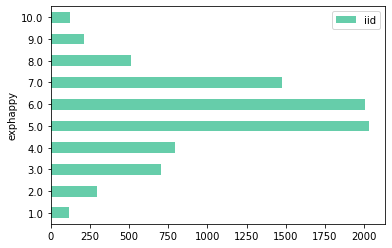

In [27]:
# exphappy = В целом, по шкале от 1 до 10, насколько вы ожидаете быть счастливыми с людьми, которых встречаете во время быстрых свиданий?
# Какой кол-во людей какую оценку поставили?
Speed_DD.groupby("exphappy")[["iid"]].count().plot.barh(color = ['#66CDAA'])
# Микровывод: Оценка "5" по 10-балльной шкале является самым популярным ответом на вопрос "Насколько вы ожидаете быть счастливыми с людьми, которых встречаете во время быстрых свиданий?"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='expnum', ylabel='Density'>

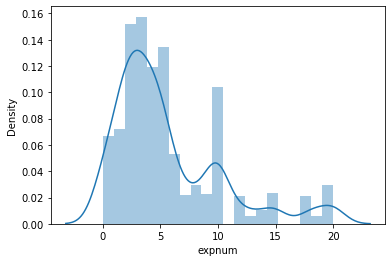

In [28]:
sns.distplot(Speed_DD["expnum"]) 
# Люди ожидали примерно 3-4 свиданий после эксперимента

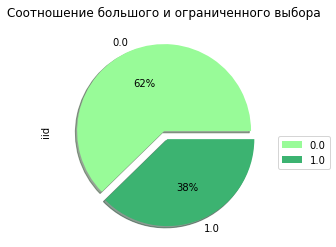

In [29]:
# Поставила в 2-ой операции "#date_3", чтобы можно было построить эту диаграмму, где 0 - это "Нет", а 1 - это "Да"
# date_3 - это ответ на вопрос "Были ли вы на свидании с кем-нибудь из ваших партнеров?"
colors = ['#98FB98', '#3CB371']
Speed_DD.groupby("date_3").count().plot.pie(y="iid", autopct='%1.0f%%', colors = colors, 
                                            explode = [0, 0.1], title = 'Соотношение большого и ограниченного выбора',  
                                            shadow = True)
plt.legend(bbox_to_anchor = (1, 0.5))
# Микровывод: Только 38% пошли на свидание со своим партнёром

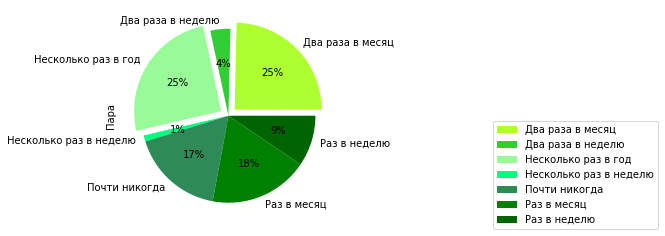

In [30]:
colors = ['#ADFF2F', '#32CD32', '#98FB98', '#00FF7F', '#2E8B57', '#008000', '#006400']
Speed_DD.groupby("Частота свиданий")[["Пара"]].count().plot.pie(y="Пара", autopct='%1.0f%%', explode = [0.1, 0, 0.1, 0, 0, 0, 0], colors = colors)
plt.legend(bbox_to_anchor = (2.5, 0.5))
#Микровывод: Те, кто часто гуляют, получили больше пар

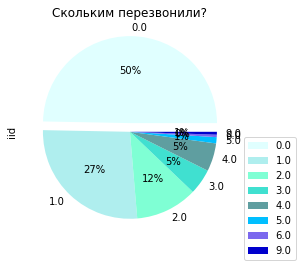

In [31]:
colors = ['#E0FFFF', '#AFEEEE', '#7FFFD4', '#40E0D0', '#5F9EA0', '#00BFFF','#7B68EE', '#0000CD']
Speed_DD.groupby("them_cal").count().plot.pie(y="iid", autopct='%1.0f%%',colors = colors, 
                                                     explode = [0.1, 0, 0, 0, 0, 0, 0, 0], title = 'Скольким перезвонили?')
plt.legend(bbox_to_anchor = (1, 0.5))
#Микровывод: 50% участников не получали звонков от своих пар, 27% получили только 1 звонок

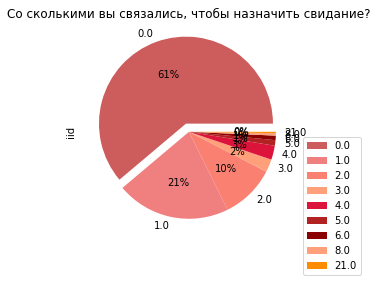

In [32]:
colors = ['#CD5C5C', '#F08080', '#FA8072', '#FFA07A', '#DC143C', '#B22222', '#8B0000','#FFA07A', '#FF8C00']
Speed_DD.groupby("you_call").count().plot.pie(y="iid", autopct='%1.0f%%', explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0], colors = colors, title = 'Со сколькими вы связались, чтобы назначить свидание?')
plt.legend(bbox_to_anchor = (1, 0.5))
#Микровывод: 62% участников не назначали никаких свиданий после экспериментов.

In [33]:
cor= Speed_DD.corr(method="spearman")
# Вычислить попарную корреляцию столбцов, исключая значения NA/null.Используя метод - ранговая корреляция Спирмена
corr_target=abs(cor["Оценка партнера по атрибутам"])
# Встроенная функция abs(x) в Python возвращает абсолютное значение аргумента x, который может быть целым или числом с плавающей точкой, или же объектом, реализующим функцию __abs__(). Для комплексных чисел функция возвращает их величину. Абсолютное значение любого числового значения -x или +x — это всегда соответствующее положительное +x.
corr_target[corr_target>=0.50]
#Микроввод:вывел "fun_o" и "like_o", далее работаем с ними 

Оценка партнера по атрибутам    1.000000
fun_o                           0.570183
like_o                          0.653525
Name: Оценка партнера по атрибутам, dtype: float64

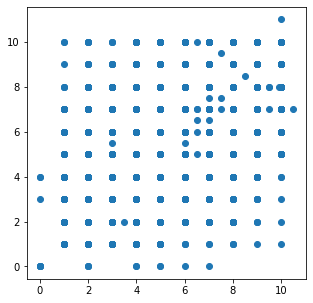

In [34]:
plt.figure(figsize=(5,5))
plt.scatter(Speed_DD['Оценка партнера по атрибутам'], Speed_DD['fun_o']) 
# Функция scatter()строит одну точку для каждого наблюдения. Ему нужны два массива одинаковой длины, один для значений по оси x и один для значений по оси y

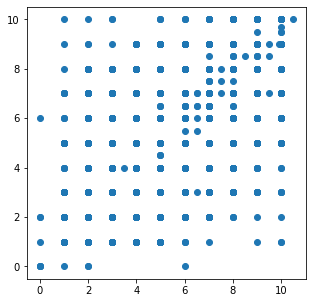

In [35]:
plt.figure(figsize=(5,5))
plt.scatter(Speed_DD['Оценка партнера по атрибутам'], Speed_DD['like_o']) 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



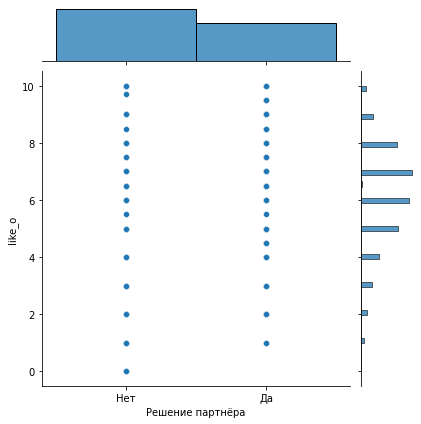

In [36]:
sns.jointplot(Speed_DD['Решение партнёра'], Speed_DD['like_o'])

In [38]:
# В программе мы Тепловые карты ещё не проходили, но мне хотелось попробовать сделать их в работе
# Сужение набора данных (нужно для построения Тепловой карты, без этой команды не получается, я пробовала)
data_1 = Speed_DD.iloc[:, 11:28] # все значения данных столбцов
data_2 = Speed_DD.iloc[:,30:35]
data_3 = Speed_DD.iloc[:, 39:43]
data_4 = Speed_DD.iloc[:, 45:67]
data_5 = Speed_DD.iloc[:, 69:74]
data_6 = Speed_DD.iloc[:, 87:91]
data_7 = Speed_DD.iloc[:, 97:102]
data_8 = Speed_DD.iloc[:, 104:107]
# Iloc - Позволяет нам выбрать конкретную ячейку набора данных, то есть это помогает нам выбрать значение, которое принадлежит к определенной строке или столбцу из набора значений кадра данных или набора данных.
# Пример: Функция ILOC [1: 3] будет включать от 1 до 3 и не включает индекс 3.
Speed_DD = pd.concat([Speed_DD.iloc[:, 0],Speed_DD.iloc[:, 2],data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8], axis=1)
Speed_DD.head()

,iid,Пол,pid,Пара,int_corr,Участник и партнер были одной расы?,Возраст партнёра,Раса партнёра,Заявленное предпочтение партнера,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,Решение партнёра,Оценка партнера по атрибутам,sinc_o,intel_o,fun_o,like_o,prob_o,met_o,Возраст,Область изучения,Раса,Важность расы,Важность религии,Родом из,Цель,Частота свиданий,Как часто вы выходите в свет (не обязательно на свидания)?,Профессия,Какова ваша предполагаемая карьера?,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,attr3_1,sinc3_1,fun3_1,intel3_1,dec,attr,sinc,intel,fun,like,prob,met
0,1,Женский,11.0,Нет,0.14,Нет,27.0,Американец европейского происхождения,35.0,20.0,20.0,20.0,0.0,5.0,Нет,6.0,8.0,8.0,8.0,7.0,4.0,2.0,21.0,Law,Американец азиатского происхождения,2.0,4.0,Chicago,Чтобы познакомиться с новыми людьми,Почти никогда,Несколько раз в неделю,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,1,6.0,9.0,7.0,7.0,7.0,6.0,2.0
1,1,Женский,12.0,Нет,0.54,Нет,22.0,Американец европейского происхождения,60.0,0.0,0.0,40.0,0.0,0.0,Нет,7.0,8.0,10.0,7.0,8.0,4.0,2.0,21.0,Law,Американец азиатского происхождения,2.0,4.0,Chicago,Чтобы познакомиться с новыми людьми,Почти никогда,Несколько раз в неделю,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,1,7.0,8.0,7.0,8.0,7.0,5.0,1.0
2,1,Женский,13.0,Да,0.16,Да,22.0,Американец азиатского происхождения,19.0,18.0,19.0,18.0,14.0,12.0,Да,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,Американец азиатского происхождения,2.0,4.0,Chicago,Чтобы познакомиться с новыми людьми,Почти никогда,Несколько раз в неделю,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,1,5.0,8.0,9.0,8.0,7.0,NaN,1.0
3,1,Женский,14.0,Да,0.61,Нет,23.0,Американец европейского происхождения,30.0,5.0,15.0,40.0,5.0,5.0,Да,7.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,Американец азиатского происхождения,2.0,4.0,Chicago,Чтобы познакомиться с новыми людьми,Почти никогда,Несколько раз в неделю,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,1,7.0,6.0,8.0,7.0,7.0,6.0,2.0
4,1,Женский,15.0,Да,0.21,Нет,24.0,Латиноамериканец,30.0,10.0,20.0,10.0,10.0,20.0,Да,8.0,7.0,9.0,6.0,8.0,6.0,2.0,21.0,Law,Американец азиатского происхождения,2.0,4.0,Chicago,Чтобы познакомиться с новыми людьми,Почти никогда,Несколько раз в неделю,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,1,5.0,6.0,7.0,7.0,6.0,6.0,2.0


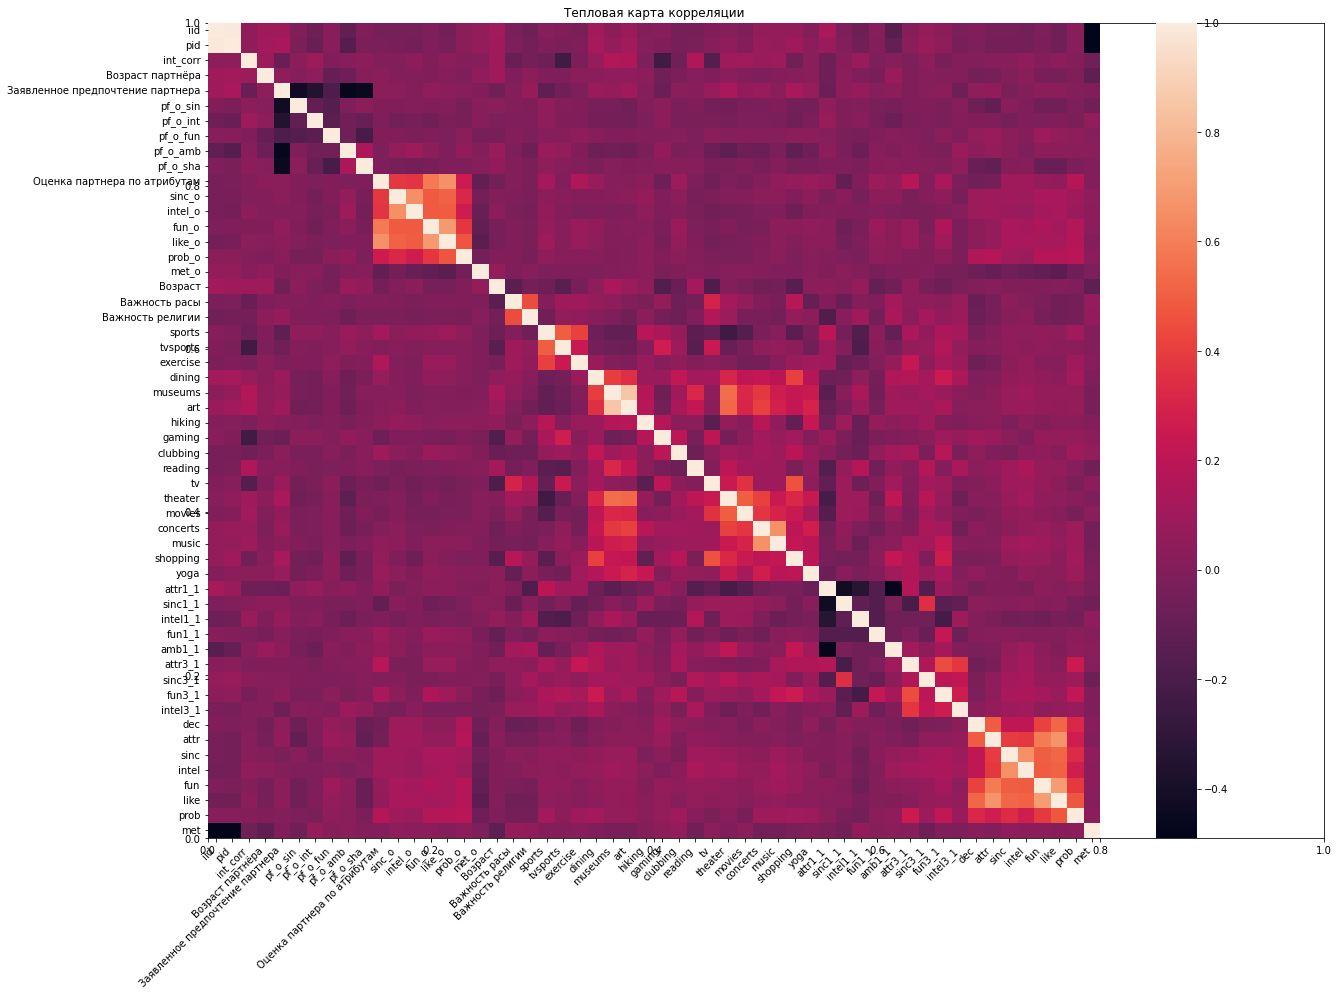

In [40]:
Speed_DD_clean = Speed_DD.dropna().reset_index(drop=True)
#Тепловая карта корреляции
plt.subplots(figsize=(20,15)) #Для регулирования размера
ax = plt.axes() #Для названия карты
ax.set_title("Тепловая карта корреляции")
corr = Speed_DD_clean.corr() #Самая важная функция для построения тепловой карты
corrplot=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corrplot.set_xticklabels(corrplot.get_xticklabels(), rotation = 45, horizontalalignment = 'right') # Для отметок на оси X (хотя график какой-то нагруженный)
plt.show()

# Выводы к практической работе:

1. 50% участников не получали звонков от своих матчеров, 27% получили только 1 звонок
2. 62% участников не назначали никаких свиданий после экспериментов.
3. Те, кто часто гуляют, получили больше "совпадений".
4. 25% людей, которые ходят на свидания два раза в месяц или несколько раз в год, получили больше совпадений.
5. Люди, у которых была цель провести фан-вечер и познакомиться с новыми людьми, получили наибольшее количество "пар".
6. Религия и раса не так важны для "соответствия". 
7. Мужчины чаще ищут в партнёре привлекательность, а женщины - интеллект.
8. Самым популярным времяпровождением для участников обоих полов является просмотр фильмов.